In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
#Run this cell to make plots look nice
import pylab
global_params = {
    'text.usetex' : False,
    'font.family' : 'serif',
    'font.sans-serif' : ['Helvetica'],
    'ps.usedistiller' : 'xpdf',
    'ps.distiller.res' : 3000,
    'axes.labelsize' : 13,
          #'text.fontsize' : 16,
    'legend.fontsize' : 10,
    'xtick.labelsize' : 12,
    'ytick.labelsize' : 12,
    'axes.linewidth': 2.0,
    'axes.grid':True,  
    'figure.figsize' : [7,5],
    'grid.linestyle':'--',
    'grid.color':'k',
    'grid.alpha':0.1}
pylab.rcParams.update(global_params) 


In this notebook you will explore how different unsupervised learning algorithms operate on the same data set

## Inspect the data

In [3]:
#read in data
data=pd.read_csv('Unsupervised.csv')
data.head(5)

,ZTFID,IAUID,RA,Dec,peakt,peakfilt,peakmag,peakabs,duration,rise,fade,type,redshift,b,A_V
0,ZTF23abhafym,SN2023tsw,05:13:15.66,+06:08:35.8,2225.96,r,18.0159,-18.95,18.878,9.598,9.280,SN Ia,0.05000,-18.588853,0.336
1,ZTF20actpatx,SN2020aaxo,23:02:26.46,+01:18:23.9,1189.65,g,18.0085,-19.59,28.215,9.015,19.200,SN Ia,0.06957,-51.317000,0.159
2,ZTF21aaodljj,SN2021epq,08:36:28.82,+74:09:58.9,1293.66,g,17.6395,-19.22,24.184,9.013,15.171,SN Ia,0.05300,33.101619,0.043
3,ZTF18acbyyff,SN2018huz,01:57:55.93,-16:20:08.6,435.77,r,18.0672,-19.42,19.377,17.076,2.301,SN Ia,0.07000,-71.194211,0.074
4,ZTF19aaefxwq,SN2019ajb,06:17:43.45,-13:53:58.9,507.75,r,18.7745,-19.22,37.470,6.976,30.494,SN Ia,0.06530,-13.660441,0.873


This data comes from a subset of the Bright Transient Survey (BTS) data set [cite this better]. There are only 2 classes, 'SN Ia' and 'SN II' which can be found under the 'type' column. For the guided part of the notebook we will be looking at the peak absolute magnitude ('peakabs') and fade ('fade') features.

In [6]:
#To do: Create a pandas dataframe that only contains the columns 'ZTFID' 'peakabs' 'fade' and 'type'
rel_cols = ['ZTFID', 'peakabs', 'fade', 'type']
relevant_data = data[rel_cols]
relevant_data

,ZTFID,peakabs,fade,type
0,ZTF23abhafym,-18.95,9.280,SN Ia
1,ZTF20actpatx,-19.59,19.200,SN Ia
2,ZTF21aaodljj,-19.22,15.171,SN Ia
3,ZTF18acbyyff,-19.42,2.301,SN Ia
4,ZTF19aaefxwq,-19.22,30.494,SN Ia
...,...,...,...,...
995,ZTF19aalztms,-17.60,14.993,SN II
996,ZTF18abyvenk,-17.77,38.014,SN II
997,ZTF18aawpwlf,-17.09,17.726,SN II
998,ZTF20aawjbsf,-17.00,18.985,SN II


Now that the data has been pared down we can explore its structure.

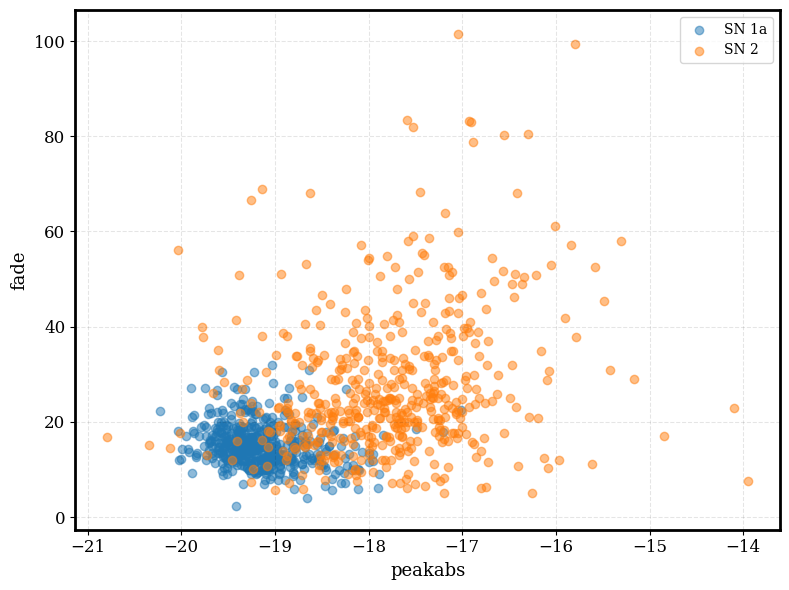

In [14]:
#To do: Make a scatter plot showing each type separately
fig,ax=plt.subplots(figsize=(8,6))
SN1a_data=relevant_data[relevant_data.type == 'SN Ia']
SN2_data=relevant_data[relevant_data.type == 'SN II']

col1, col2 = 'peakabs', 'fade'

ax.scatter(SN1a_data[col1], SN1a_data[col2], label='SN 1a', alpha=0.5)
ax.scatter(SN2_data[col1], SN2_data[col2], label='SN 2', alpha=0.5)

ax.set_ylabel(col2)
ax.set_xlabel(col1)


ax.legend()
plt.tight_layout()

By eye we can see that the two classes live in different areas of this plane. SNII tend to have longer fade time and are dimmer (larger peak magnitude). Also SN II have a larger spread compared to SN Ia. If you do not see these trends ask for help from the instructor. 

## Unsupervised learning

Now let's take a dive into the unsupervised learning algorithms! The first thing we should do is scale the data. Let's use the standard scaler provided by sklearn

In [25]:
from sklearn.preprocessing import StandardScaler
# T0 do: apply the standard scaler to the data
# see docs at : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

feature_data=relevant_data[[col1, col2]]
scaler=StandardScaler().fit(feature_data)
scaled_data=scaler.transform(feature_data)

## Kmeans

In [26]:
from sklearn.cluster import KMeans
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.k_means.html

The Kmeans algorithms main knob to turn is the number of cluster. Lets see what it looks like to use different number of clusters

In [27]:
#To do: train kemans for 2,5 and 10 clusters

res = {2:None, 5:None, 10:None}

#example
for key in res:
    ex_model=KMeans(n_clusters=key) #define a model
    ex_model.fit(scaled_data)      #fit the model
    res[key] = ex_model.predict(scaled_data)  #get the classes

Now plot them and compare to the true classes

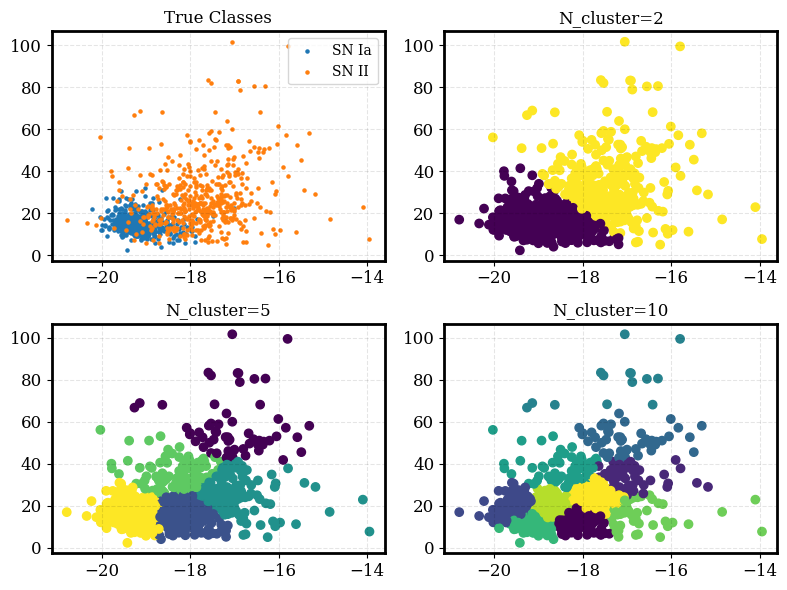

In [32]:
#To do: Plot the true classes and 3 kmeans
#hint: use Kmeans.fit(scaled_data).predict(scaled_data) for your color map
fig,axs=plt.subplots(2,2,figsize=(8,6))
axs=axs.flatten()
axs[0].scatter(SN1a_data['peakabs'],SN1a_data['fade'],label='SN Ia',s=5)
axs[0].scatter(SN2_data['peakabs'],SN2_data['fade'],label='SN II',s=5)
axs[0].set_title('True Classes')
axs[0].legend()

for ax, (n_clus,classes) in zip(axs[1:], res.items()):
    ax.scatter(feature_data['peakabs'],feature_data['fade'],c=classes)
    ax.set_title(f'N_cluster={n_clus}')
plt.tight_layout()

How does it look? Can we determine the number of clusters systematically? KMeans is not well equipped to answer this question, keep this in mind for Gaussian Mixture

## DBSCAN

In [33]:
from sklearn.cluster import DBSCAN
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

DBSCAN does not take a number of clusters as a parameter. Instead it has epsilon and min samples as tunable parameters.

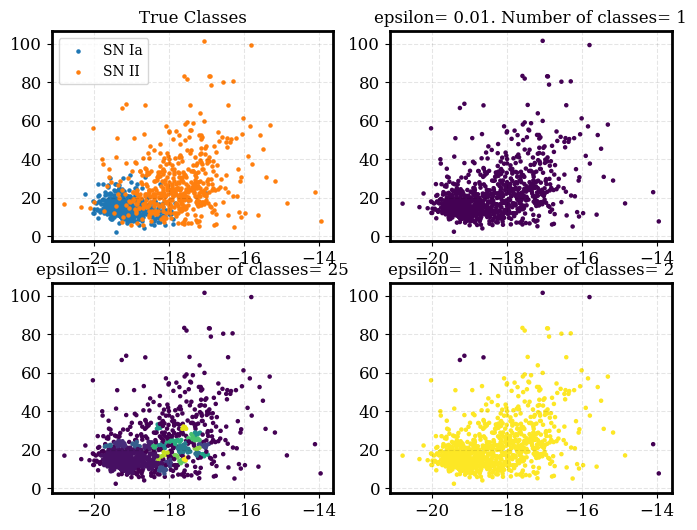

In [38]:
#To do: Test a few different epsilon values and find out how many classes are created
fig,axs=plt.subplots(2,2,figsize=(8,6))
axs=axs.flatten()
axs[0].scatter(SN1a_data['peakabs'],SN1a_data['fade'],label='SN Ia',s=5)
axs[0].scatter(SN2_data['peakabs'],SN2_data['fade'],label='SN II',s=5)
axs[0].set_title('True Classes')
axs[0].legend()

epsilons=[0.01,0.1,1] #pick 3 values here

for i,eps in enumerate(epsilons):
    model=DBSCAN(eps) #keep min_samples as the default
    model.fit(scaled_data)
    axs[i+1].scatter(feature_data['peakabs'],feature_data['fade'],c=model.labels_,s=5)
    axs[i+1].set_title(f'epsilon= {eps}. Number of classes= {len(np.unique(model.labels_))}')


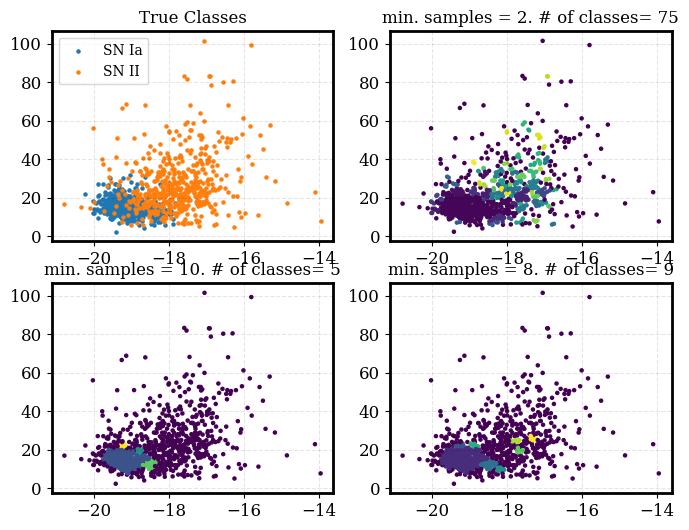

In [51]:
#To do: Now do the same but vary min samples. Keep eps=0.2
fig,axs=plt.subplots(2,2,figsize=(8,6))
axs=axs.flatten()
axs[0].scatter(SN1a_data['peakabs'],SN1a_data['fade'],label='SN Ia',s=5)
axs[0].scatter(SN2_data['peakabs'],SN2_data['fade'],label='SN II',s=5)
axs[0].set_title('True Classes')
axs[0].legend()

min_samples=[2,10,8] #pick 3 values here
eps = 0.1

for i,m in enumerate(min_samples):
    model=DBSCAN(eps=eps, min_samples=m) #keep min_samples as the default
    model.fit(scaled_data)
    axs[i+1].scatter(feature_data['peakabs'],feature_data['fade'],c=model.labels_,s=5)
    axs[i+1].set_title(f'min. samples = {m}. # of classes= {len(np.unique(model.labels_))}')

Changing epsilon and minimum samples can dramaticly change the outcome. Now lets do some bad science and try to pick epsilon and minimum samples to match our data! (this is for academic purposes only).

Since the density of the two classes differ DBSCAN is not ideal for this data set.

## Gaussian Mixture Model

In [52]:
from sklearn.mixture import GaussianMixture
# https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture

One advantage that Gaussian Mixture Model (GMM) has is its statistical basis. This implementaion of GMM has built in functions for the Bayesian and Akaike information criterion (BIC and AIC). These give you an idea of how good the model is. We can use this to determine how many clusters we should choose!

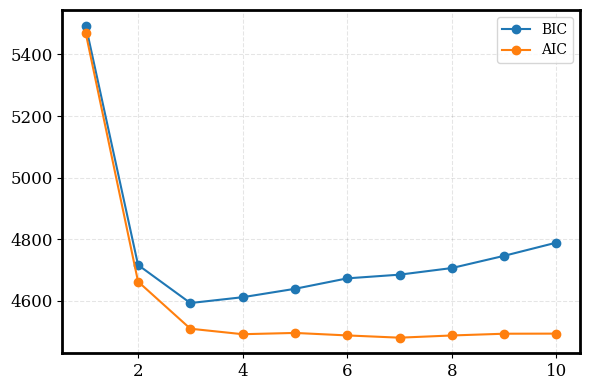

In [59]:
# To do: Compute and Plot the BIC and AIC for a variety of cluster numbers
def info_score(scaled_data, n, t='bic'):
    model = GaussianMixture(n_components=n).fit(scaled_data)
    return eval(f'model.{t}(scaled_data)')
    
number_of_clusters=[1,2,3,4,5,6,7,8,9,10]
bic=[info_score(scaled_data, n) for n in number_of_clusters]
aic=[info_score(scaled_data, n, t='aic') for n in number_of_clusters]

fig,ax=plt.subplots(figsize=(6,4))
ax.plot(number_of_clusters,bic,label='BIC',marker='o')
ax.plot(number_of_clusters,aic,label='AIC',marker='o')
ax.legend()
plt.tight_layout()

In the plot we can see that the BIC is minimum at 3 and the AIC starts to get diminishing returns at 3. So this tells us that the number of cluster is probably 2,3 or 4.(If you don't see this ask for help) Now let's fit for those parameters and see what it looks like.

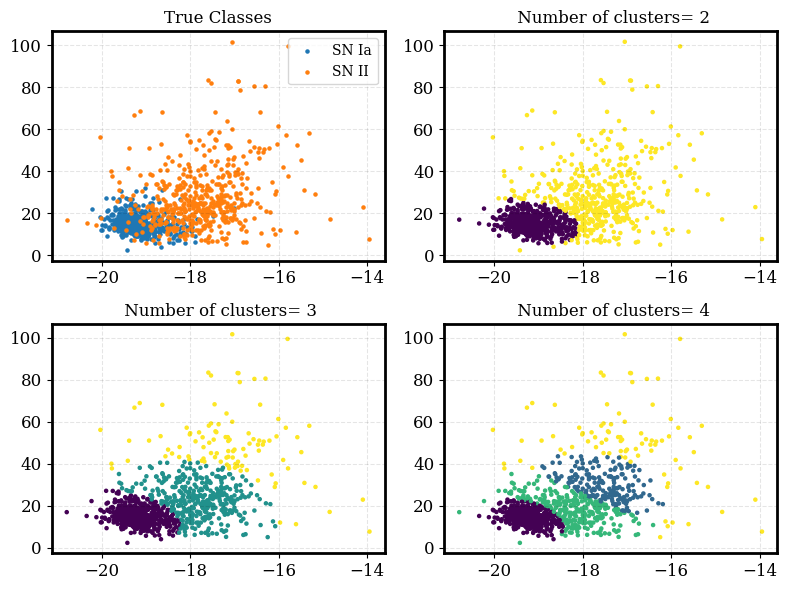

In [61]:
#To do: Plot gmm models for 2,3 and 4 clusters.
fig,axs=plt.subplots(2,2,figsize=(8,6))
axs=axs.flatten()
axs[0].scatter(SN1a_data['peakabs'],SN1a_data['fade'],label='SN Ia',s=5)
axs[0].scatter(SN2_data['peakabs'],SN2_data['fade'],label='SN II',s=5)
axs[0].set_title('True Classes')
axs[0].legend()

number_of_clusters=[2,3,4] 

for i,n_clus in enumerate(number_of_clusters):
    model=GaussianMixture(n_components=n_clus)
    model.fit(scaled_data)
    axs[i+1].scatter(feature_data['peakabs'],feature_data['fade'],c=model.predict(scaled_data),s=5)
    axs[i+1].set_title(f' Number of clusters= {n_clus}')
plt.tight_layout()

2 clusters doesn't look too bad! Now let's try to extract the gaussians from the model

In [93]:
#function to plot a contour
def plot_contour(ax,center,cov,lvls=3,cmap='viridis'):
    '''
    ax:     matplotlib axis that you want the contour to be plotted on
    center: array of mean of gaussian [x_mean,ymean]
    cov:    covariance matrix
    sig:    int, number of contours to plot
    cmap:   Matplotlib color map
    '''
    x = np.arange(-21, -14, .1)
    y = np.arange(0, 120, .1)
    X, Y = np.meshgrid(x, y)
    xhat=center[0]
    yhat=center[1]
    sigx=cov[0][0]
    sigy=cov[1][1]
    A=(X-xhat)**2/((2*sigx)**2) #Ignoring covariance
    B=(Y-yhat)**2/(2*sigy**2)
    Z=np.exp(-(A+B))
    ax.contour(X, Y, Z,levels=lvls-1,linestyles='dashed',cmap=cmap)

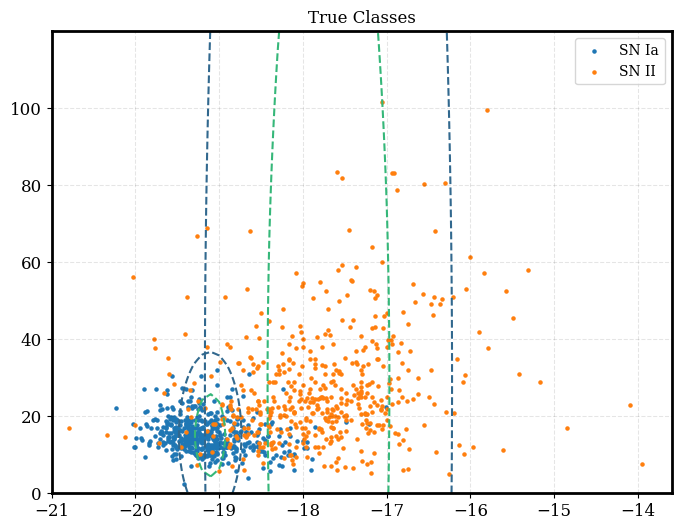

In [94]:
#To do: Plot the contours of the gaussians found by the model over the data
fig,ax=plt.subplots(figsize=(8,6))
model=GaussianMixture(n_components=2).fit(feature_data) #Use feature data instead of scaled data 
mean=model.means_
cov=model.covariances_
ax.scatter(SN1a_data['peakabs'],SN1a_data['fade'],label='SN Ia',s=5)
ax.scatter(SN2_data['peakabs'],SN2_data['fade'],label='SN II',s=5)
ax.set_title('True Classes')
for m,c in zip(mean, cov):
    plot_contour(ax, m, c)

ax.legend()

## Wrap up

Here is a plot showing all 3 algorithms at once. I hope you all have learned when each one can be used as well as the advantages and disadvantages of each!

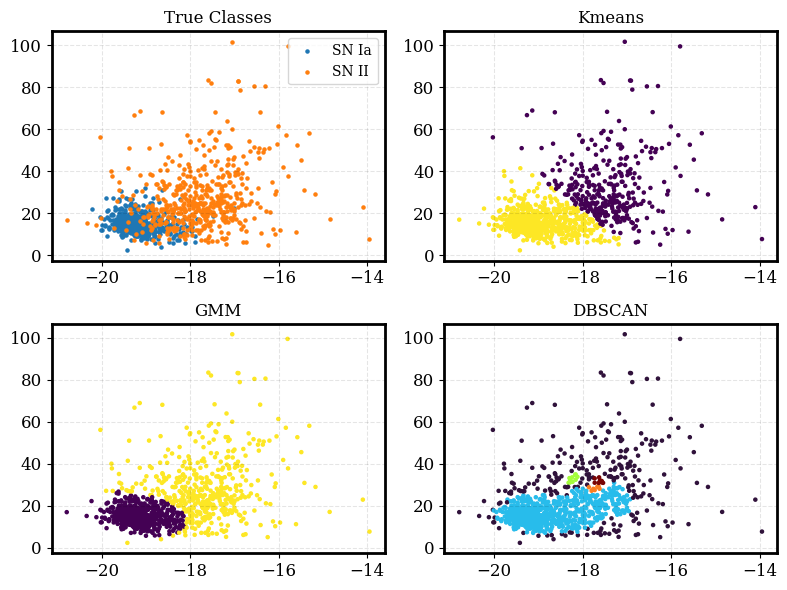

In [68]:
fig,axs=plt.subplots(2,2,figsize=(8,6))
axs=axs.flatten()
axs[0].scatter(SN1a_data['peakabs'],SN1a_data['fade'],label='SN Ia',s=5)
axs[0].scatter(SN2_data['peakabs'],SN2_data['fade'],label='SN II',s=5)
axs[0].set_title('True Classes')
axs[0].legend()


kmeans_model=KMeans(n_clusters=2).fit(scaled_data)
axs[1].scatter(feature_data['peakabs'],feature_data['fade'],c=kmeans_model.predict(scaled_data),s=5)
axs[1].set_title('Kmeans')



gmm_model=GaussianMixture(n_components=2).fit(scaled_data)
axs[2].scatter(feature_data['peakabs'],feature_data['fade'],c=gmm_model.predict(scaled_data),s=5)
axs[2].set_title('GMM')

db=DBSCAN(eps=0.15,min_samples=7).fit(scaled_data)
axs[3].scatter(feature_data['peakabs'],feature_data['fade'],c=db.labels_,s=5,cmap='turbo')
axs[3].set_title('DBSCAN')
plt.tight_layout()

## Bonus
Try your hand at these 2 things! 
1) Compute an accuracy for the various methods. Typically, you wouldn't know the classes in an unsupervised problem but we do here. See how they performed! 
2) Use different "important" features and see what they look like.

In [90]:
import warnings; warnings.simplefilter("ignore")

def get_acc(feature_data, labels):
    feature_data['pred_labels'] = labels
    feature_data['type1'] = feature_data.type.replace({'SN Ia': 0, 'SN II': 1})
    feature_data['type2'] = feature_data.type.replace({'SN Ia': 1, 'SN II': 0})

    acc1 = (feature_data.type1 == feature_data.pred_labels).sum()/len(feature_data)
    acc2 = (feature_data.type2 == feature_data.pred_labels).sum()/len(feature_data)
    
    return max(acc1, acc2)

gmm_acc = get_acc(relevant_data, gmm_model.predict(scaled_data))
print(f'Accuracy of GMM: {gmm_acc}')

kmeans_acc = get_acc(relevant_data, kmeans_model.predict(scaled_data))
print(f'Accuracy of KMeans: {kmeans_acc}')

db_acc = get_acc(relevant_data, db.labels_)
print(f'Accuracy of DBSCAN: {db_acc}')

Accuracy of GMM: 0.879
Accuracy of KMeans: 0.823
Accuracy of DBSCAN: 0.476
